In [1]:
from casadi import *
import matplotlib.pyplot as plt
import numpy as np

## Pendulum exercise
$$
\begin{split}\begin{array}{lc}
\begin{array}{l}
\text{minimize:} \\
x(\cdot) \in \mathbb{R}^2, \, u(\cdot) \in \mathbb{R}
\end{array}
\quad \displaystyle \int_{t=0}^{T}{cos(x_0) \, dt}
\\
\\
\text{subject to:} \\
\\
\begin{array}{ll}
\left\{
\begin{array}{l}
\dot{x}_0 = x_1 \\
\dot{x}_1 = u - sin(x_0) \\
-u_{max} \le u \le u_{max} , \quad
\end{array} \right. & \text{for} \, 0 \le t \le T \\
x_0(0)=0, \quad x_1(0)=0, x_0(T) = pi/2 , x_1(T) = 0
\end{array}
\end{array}\end{split}
$$
with $T=10$.

siendo $$x_0 = \theta$$ $$x_1 = \theta'$$

In [225]:
x = MX.sym('x', 2)
t = MX.sym('t')
dt = MX.sym('dt')
u = MX.sym('u')

In [226]:
rhs = vertcat(x[1], u-sin(x[0]))
#rhs = vertcat(x[1], u)
F = Function('F', [x, u], [rhs])

In [227]:
k1 = F(x, u);
k2 = F(x + dt/2 * k1, u)
k3 = F(x + dt/2 * k2, u)
k4 = F(x + dt * k3, u);
new_x_expr = x+dt/6*(k1 +2*k2 +2*k3 +k4)

In [228]:
#new_x_expr = x + dt * F(x, u)
new_x = Function('New_x', [x, u, dt], [new_x_expr])

In [229]:
F([0,1],2)

DM([1, 2])

In [230]:
new_x([0,1],2,0.1)

DM([0.109825, 1.19468])

In [264]:
N = 200

In [303]:
opti = Opti()
opti.solver('ipopt')

In [304]:
X = opti.variable(N+1,2)
U = opti.variable(N)
T = opti.variable()
u_m = opti.parameter()

In [305]:
cost = sum1(2+cos(X[:,0]))*T #**2
#cost = -sum1(X[:,0])
opti.minimize(cost)

In [306]:
opti.subject_to(X[0,:].T == [0, 0])
opti.subject_to(cos(X[-1,0]) < -0.9999)
opti.subject_to(opti.bounded(-0.001,X[-1,1],0.001))

arr[3,:], new_x(arr[2,:])

In [307]:
for ii in range(N):
    opti.subject_to(X[ii+1,:].T == new_x(X[ii,:], U[ii], T/N))
    #opti.subject_to(U[ii] > -u_m)
    opti.subject_to(opti.bounded(-u_m,U[ii],u_m))

In [308]:
opti.set_initial(X[:,0], np.linspace(0, pi, N+1))
opti.set_initial(X[:,1], pi/N)
opti.set_initial(T, 100)

In [309]:
max_par = 0.1
opti.set_value(u_m, max_par)

In [310]:
sol = opti.solve()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     2002
Number of nonzeros in inequality constraint Jacobian.:      202
Number of nonzeros in Lagrangian Hessian.............:     1803

Total number of variables............................:      603
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      402
Total number of inequality constraints...............:      202
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      201
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

  89  3.1841548e+04 2.61e-03 4.05e+01  -1.0 9.91e-01   1.6 4.66e-01 4.02e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90  3.1738185e+04 2.72e-03 4.09e+01  -1.0 4.00e+00   1.1 1.02e-01 7.07e-02f  1
  91  3.1699192e+04 2.75e-03 4.10e+01  -1.0 1.21e+01   0.6 1.36e-02 1.14e-02f  1
  92  3.1622795e+04 2.88e-03 3.98e+01  -1.0 2.82e+00   1.0 1.41e-01 1.16e-01f  1
  93  3.1504206e+04 3.27e-03 4.05e+01  -1.0 2.20e+01   0.6 2.47e-03 2.02e-02f  1
  94  3.1489503e+04 3.30e-03 4.05e+01  -1.0 2.70e+01   0.1 5.30e-03 2.22e-03f  1
  95  3.1436153e+04 3.09e-03 3.96e+01  -1.0 1.36e+00   1.4 1.60e-01 1.37e-01f  1
  96  3.1302730e+04 4.38e-03 3.98e+01  -1.0 5.73e+00   0.9 4.20e-02 7.27e-02f  1
  97  3.1253456e+04 4.11e-03 3.96e+01  -1.0 1.68e+00   1.4 2.13e-01 9.06e-02f  1
  98  3.1168796e+04 4.20e-03 4.01e+01  -1.0 7.19e+00   0.9 3.32e-02 3.36e-02f  1
  99  3.1134959e+04 4.19e-03 3.97e+01  -1.0 7.44e+00   0.4 4.08e-02 1.93e-02f  1
iter    objective    inf_pr 

 181  2.5237272e+04 2.44e-03 3.31e+01  -1.0 6.70e-01   1.6 3.35e-01 3.24e-01f  1
 182  2.5143743e+04 2.50e-03 3.42e+01  -1.0 3.38e+00   1.2 9.35e-02 7.97e-02f  1
 183  2.5079242e+04 2.06e-03 3.38e+01  -1.0 8.34e-01   1.6 4.78e-01 2.41e-01f  1
 184  2.4973990e+04 2.18e-03 3.42e+01  -1.0 2.82e+00   1.1 7.20e-02 1.19e-01f  1
 185  2.4913565e+04 1.90e-03 3.41e+01  -1.0 9.89e-01   1.5 4.45e-01 1.86e-01f  1
 186  2.4845431e+04 1.92e-03 3.52e+01  -1.0 5.81e+00   1.1 1.89e-02 3.26e-02f  1
 187  2.4737133e+04 1.72e-03 3.47e+01  -1.0 1.10e+00   1.5 3.87e-01 2.94e-01f  1
 188  2.4717157e+04 1.71e-03 3.50e+01  -1.0 5.29e+00   1.0 4.07e-03 1.12e-02f  1
 189  2.4667643e+04 1.57e-03 3.46e+01  -1.0 1.17e+00   1.4 8.17e-02 1.29e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190  2.4610875e+04 1.07e-03 3.33e+01  -1.0 4.34e-01   1.9 5.21e-01 3.73e-01f  1
 191  2.4564012e+04 1.04e-03 3.40e+01  -1.0 1.76e+00   1.4 1.04e-01 7.44e-02f  1
 192  2.4504405e+04 8.10e-04

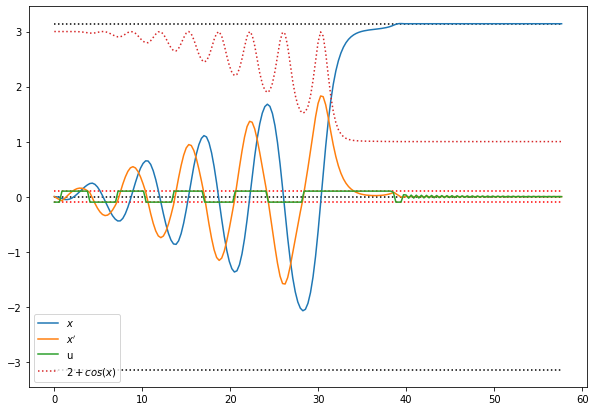

In [311]:
arr = sol.value(X)
timescale_x = np.linspace(0, sol.value(T), N+1)
timescale_u = np.linspace(0, sol.value(T), N)
arr_u = sol.value(U)
plt.figure(figsize=[10,7])
plt.plot(timescale_x,arr[:,0], label = '$x$')
plt.plot(timescale_x,arr[:,1], label = "$x'$")
plt.plot(timescale_u,arr_u[:], label = 'u')
plt.plot(timescale_x,2+cos(arr[:,0]),':', label = '$2+cos(x)$')
plt.hlines([0,pi, -pi], 0, timescale_u[-1], 'k', 'dotted')
plt.hlines([-max_par,max_par], 0, timescale_u[-1], 'r', 'dotted')
plt.legend()

In [224]:
arr[-10:,:]

array([[ 3.14159265e+00,  1.08319407e-15],
       [ 3.14159265e+00, -1.23298656e-14],
       [ 3.14159265e+00, -4.66322604e-14],
       [ 3.14159265e+00,  6.07392327e-15],
       [ 3.14159265e+00,  4.48586873e-13],
       [ 3.14159265e+00,  3.29235391e-13],
       [ 3.14159265e+00, -5.58442335e-12],
       [ 3.14159265e+00,  1.29165533e-11],
       [ 3.14159265e+00, -1.22765541e-11],
       [ 3.14159265e+00,  8.40646467e-13]])

In [37]:
cos(arr[:,0])

DM([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
cos(np.linspace(0, pi, N+1))

DM([1, 0.999507, 0.998027, 0.995562, 0.992115, 0.987688, 0.982287, 0.975917, 0.968583, 0.960294, 0.951057, 0.940881, 0.929776, 0.917755, 0.904827, 0.891007, 0.876307, 0.860742, 0.844328, 0.827081, 0.809017, 0.790155, 0.770513, 0.750111, 0.728969, 0.707107, 0.684547, 0.661312, 0.637424, 0.612907, 0.587785, 0.562083, 0.535827, 0.509041, 0.481754, 0.45399, 0.425779, 0.397148, 0.368125, 0.338738, 0.309017, 0.278991, 0.24869, 0.218143, 0.187381, 0.156434, 0.125333, 0.0941083, 0.0627905, 0.0314108, -1.60812e-16, -0.0314108, -0.0627905, -0.0941083, -0.125333, -0.156434, -0.187381, -0.218143, -0.24869, -0.278991, -0.309017, -0.338738, -0.368125, -0.397148, -0.425779, -0.45399, -0.481754, -0.509041, -0.535827, -0.562083, -0.587785, -0.612907, -0.637424, -0.661312, -0.684547, -0.707107, -0.728969, -0.750111, -0.770513, -0.790155, -0.809017, -0.827081, -0.844328, -0.860742, -0.876307, -0.891007, -0.904827, -0.917755, -0.929776, -0.940881, -0.951057, -0.960294, -0.968583, -0.975917, -0.982287, -0.

In [63]:
-sum1(np.linspace(0, pi, N+1))

DM(-158.65)

In [201]:
opti.debug.show_infeasibilities()

Violated constraints (tol 0), in order of declaration:
------- i = 0/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-198-1f24814f4073>:1
At nonzero 0.
------- i = 1/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-198-1f24814f4073>:1
At nonzero 1.
------- i = 2/453 ------ 
-inf <= 1 <= -0.998 (viol 1.998)
Opti constraint of shape 1x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-198-1f24814f4073>:3
------- i = 3/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 4/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IR

0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 208/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 1.
------- i = 210/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 211/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 1.
------- i = 213/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 2

0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 415/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 1.
------- i = 417/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 418/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 1.
------- i = 420/453 ------ 
0 <= 0 <= 0 (viol 0)
Opti constraint of shape 2x1, defined at /Users/smorenom/Documents/Python/Repo Github/Cosejas_IRI/Casadi/<ipython-input-199-96a21ab329a3>:2
At nonzero 0.
------- i = 4

In [68]:
(1.1+cos(arr[:,0]))* sol.value(T)

DM([83.8128, 83.8128, 83.8125, 83.8099, 83.8015, 83.7824, 83.7471, 83.6911, 83.6111, 83.5068, 83.381, 83.2401, 83.0936, 83.0177, 83.0311, 83.1342, 83.3078, 83.5135, 83.6989, 83.805, 83.7756, 83.5683, 83.1635, 82.5713, 81.8323, 81.0135, 80.2002, 79.4835, 78.949, 78.8195, 79.1299, 79.8443, 80.8542, 81.9838, 83.0067, 83.6759, 83.7676, 83.1296, 81.7223, 79.637, 77.0825, 74.3454, 71.7371, 69.5452, 68.0012, 67.5219, 68.184, 69.9437, 72.6235, 75.8918, 79.252, 82.0684, 83.6573, 83.4453, 81.1495, 76.8967, 71.2054, 64.8293, 58.5421, 52.9677, 48.5122, 45.3861, 43.6701, 43.7009, 45.4796, 48.9934, 54.165, 60.7462, 68.1759, 75.4601, 81.1829, 83.776, 82.0606, 75.8322, 66.0745, 54.5706, 43.1559, 33.1181, 25.0249, 18.8875, 14.4237, 11.2633, 9.06103, 7.53796, 6.48602, 5.75677, 5.24718, 4.88686, 4.62816, 4.43905, 4.29815, 4.19148, 4.11034, 4.05013, 4.0111, 3.99563, 3.99136, 3.99127, 3.99172, 3.99147, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.99108, 3.9910

In [44]:
sum1(cos(arr[:,0]))

DM(101)

In [45]:
sol.value(U)

array([ 0.00000000e+00,  1.22026922e-30, -5.55111518e-17, -5.55111518e-17,
        1.66533455e-16,  1.11022304e-16, -1.66533455e-16,  2.22044607e-16,
       -9.76215380e-30,  5.55111518e-17, -2.22044607e-16, -5.55111518e-16,
       -3.33066911e-16,  3.33066911e-16,  2.22044607e-16, -6.16297588e-31,
       -4.44089214e-16, -5.55111518e-16, -1.11022304e-16,  9.99200732e-16,
        3.33066911e-16,  3.33066911e-16,  3.33066910e-16,  1.11022303e-16,
       -7.77156125e-16,  3.33066911e-16,  7.77156125e-16, -5.55111518e-16,
        7.77156125e-16, -1.11022304e-16, -3.33066910e-16, -1.60982340e-15,
       -1.11022304e-16,  1.05471188e-15,  1.44328995e-15, -4.99600366e-16,
       -1.11022303e-16, -1.38777880e-15,  7.77156125e-16,  1.27675649e-15,
       -1.11022304e-16, -9.43689582e-16, -9.99200732e-16, -5.55111518e-16,
        1.66533455e-15, -1.44328995e-15,  1.22124534e-15,  1.22124534e-15,
        7.77156125e-16,  1.44328994e-15,  0.00000000e+00,  3.33066905e-16,
       -1.44328995e-15, -